## Load library

In [13]:
import numpy as np
from numpy import fft
import matplotlib.pyplot as plt

In [ ]:
import os
os.getcwd()

# load data and explore
The data is generated from uhs_dial_tone

In [2]:
# load data
# audiodata = np.fromfile('/tmp/dial_tone.dat',dtype="float") default float64
audiodata = np.fromfile('./data/dial_tone.dat',dtype="float32")

In [11]:
# audio length
# data_size = audiodata.shape[0]
data_size = len(audiodata)
print("The total samples are %d" % data_size)
data_memory_usage = data_size*32/(1024*1024*8)
print("This file is %.2fMB" % data_memory_usage)
sampling_rate = 32000   #采样率：32k
data_time = data_size/sampling_rate
print("This audio last for %fs" % time)

The total samples are 333824
This file is 1.27MB
This audio last for 10.432000s


# Time Sequency Analysis

(-0.44000105559825897, 0.44000105559825897)


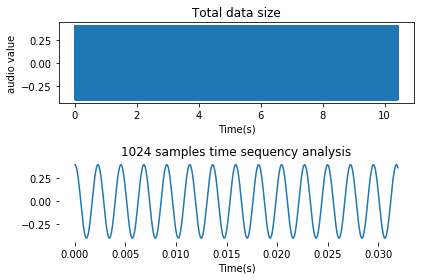

In [58]:
time_series = np.linspace(0,data_time,data_size)
fig, ax = plt.subplots(2, 1)
ax[0].plot(time_series, audiodata)
ax[0].set_title("Total data size")
ax[0].set_xlabel("Time(s)")
ax[0].set_ylabel("audio value")
# ax[0].set_axisbelow(False)

ax[1].plot(time_series[:1024], audiodata[:1024])
ax[1].set_title("1024 samples time sequency analysis")
ax[1].set_xlabel("Time(s)")
ax[1].set_frame_on(0)
# ax[1].set_axis_on()
print(ax[1].get_ybound())
# ax[1].set_fc('y')
# plt.subplots_adjust(hspace=0.8)
fig.tight_layout()
plt.show()

# Spectrum Analysis
fft, psd(功率普密度), plomb(periodogram)

/home/labuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  app.launch_new_instance()


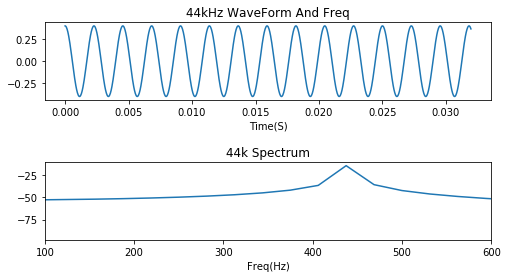

In [80]:
# Ref: https://www.cnblogs.com/jingsupo/p/9989559.html
import pylab as pl#导入一个绘图模块，matplotlib下的模块

audiodata = np.fromfile('/tmp/dial_tone.dat',dtype="float32")
sampling_rate = 32000#采样频率为32kHz
fft_size = 1024 #FFT处理的取样长度
t = np.arange(0, len(audiodata)/sampling_rate, 1.0/sampling_rate)#np.arange(起点，终点，间隔)产生1s长的取样时间
# x = np.sin(2*np.pi*156.25*t) + 2*np.sin(2*np.pi*234.375*t)#两个正弦波叠加，156.25HZ和234.375HZ
x = audiodata
# N点FFT进行精确频谱分析的要求是N个取样点包含整数个取样对象的波形。因此N点FFT能够完美计算频谱对取样对象的要求是n*Fs/N（n*采样频率/FFT长度），
# 因此对8KHZ和512点而言，完美采样对象的周期最小要求是8000/512=15.625HZ,所以156.25的n为10,234.375的n为15。
xs = x[:fft_size]# 从波形数据中取样fft_size个点进行运算
xf = np.fft.rfft(xs)/fft_size# 利用np.fft.rfft()进行FFT计算，rfft()是为了更方便对实数信号进行变换，由公式可知/fft_size为了正确显示波形能量
# rfft函数的返回值是N/2+1个复数，分别表示从0(Hz)到sampling_rate/2(Hz)的分。
#于是可以通过下面的np.linspace计算出返回值中每个下标对应的真正的频率：
freqs = np.linspace(0, sampling_rate/2, fft_size/2+1)
# np.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)
#在指定的间隔内返回均匀间隔的数字
xfp = 20*np.log10(np.clip(np.abs(xf), 1e-20, 1e100))
#最后我们计算每个频率分量的幅值，并通过 20*np.log10()将其转换为以db单位的值。为了防止0幅值的成分造成log10无法计算，我们调用np.clip对xf的幅值进行上下限处理

#绘图显示结果
pl.figure(figsize=(8,4))
pl.subplot(211)
pl.plot(t[:fft_size], xs)
pl.xlabel(u"Time(S)")
pl.title(u"44kHz WaveForm And Freq")
pl.subplot(212)
pl.plot(freqs, xfp)
pl.title("44k Spectrum")
pl.xlabel(u"Freq(Hz)")
pl.subplots_adjust(hspace=0.8)
pl.xlim(100,600)
pl.show()

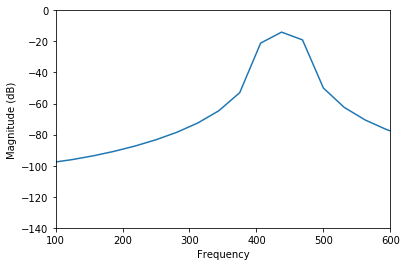

In [66]:
# plt.magnitude_spectrum(audiodata[:1024],Fs=32000)
plt.magnitude_spectrum(audiodata[:1024],Fs=32000,sides='twosided',scale='dB')
plt.xlim(100,600)
plt.ylim(-140,0)
plt.show()

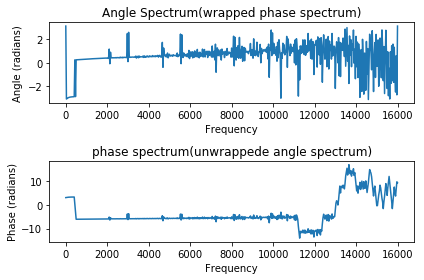

In [79]:
plt.subplot(2,1,1)
plt.angle_spectrum(audiodata[:1024],Fs=32000)
plt.title('Angle Spectrum(wrapped phase spectrum)')
plt.subplot(2,1,2)
plt.phase_spectrum(audiodata[:1024],Fs=32000,)
plt.title('Phase Spectrum(unwrappede angle spectrum)')
plt.tight_layout()
plt.show()

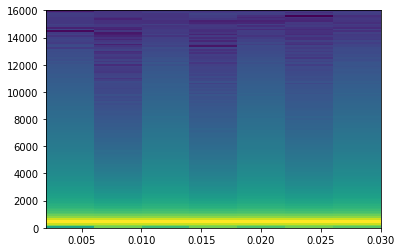

In [81]:
plt.specgram(audiodata[:1024],Fs = 32000)
plt.show()